In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os
import pandas as pd
import numpy as np
import calmap
import pandas_bokeh
from IPython.display import Image

In [22]:
os.chdir("../data")
rain_month=pd.read_csv("group_month.csv", engine = "c")
monthly=rain_month.iloc[:,1:]
monthly.head()

,month,Rainy,month_name,day
0,1,Wet,Jan,93
1,2,Wet,Feb,85
2,3,Wet,Mar,93
3,4,Wet,Apr,90
4,5,Wet,May,93


Text(0.5, 1.0, 'Number of days monthly when  get wet commuting at typical work times in Dublin, Ireland.')

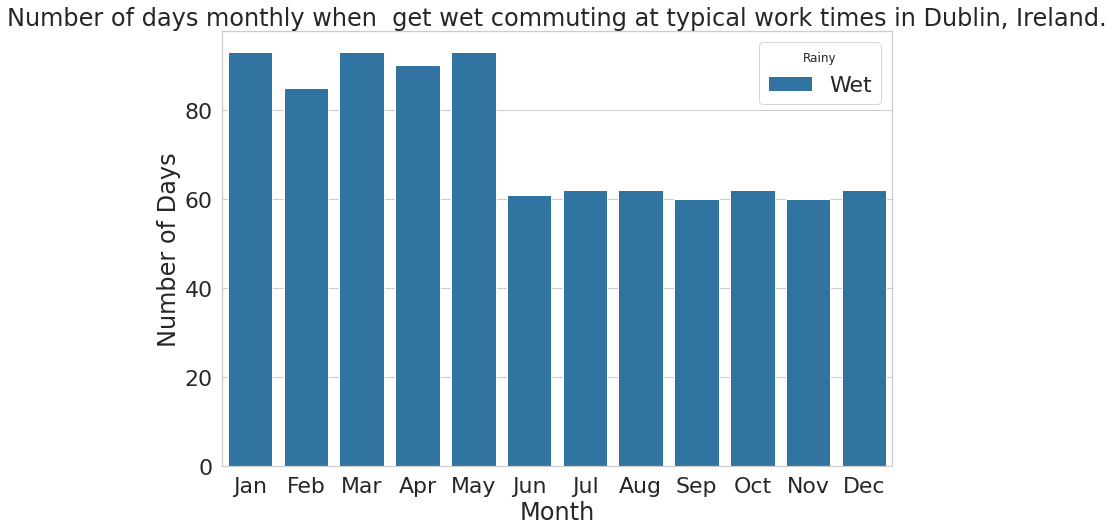

In [23]:
# Monthly plot of rainy days
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="month_name", y="day", hue="Rainy", data=monthly.sort_values(['month', 'Rainy']))
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.title("Number of days monthly when  get wet commuting at typical work times in Dublin, Ireland.")

In [55]:
#Tenia todos los plots bien ploteados y he fuento a hacer run y se me han descuajeringado
#menos mal que los guarde y los podemos ver en la pagina de analisis que es la importante


os.chdir("../data")
rain_ho_day=pd.read_csv("rainy_days_hours", engine = "c")
rain_ho_day=rain_ho_day.iloc[:,1:]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

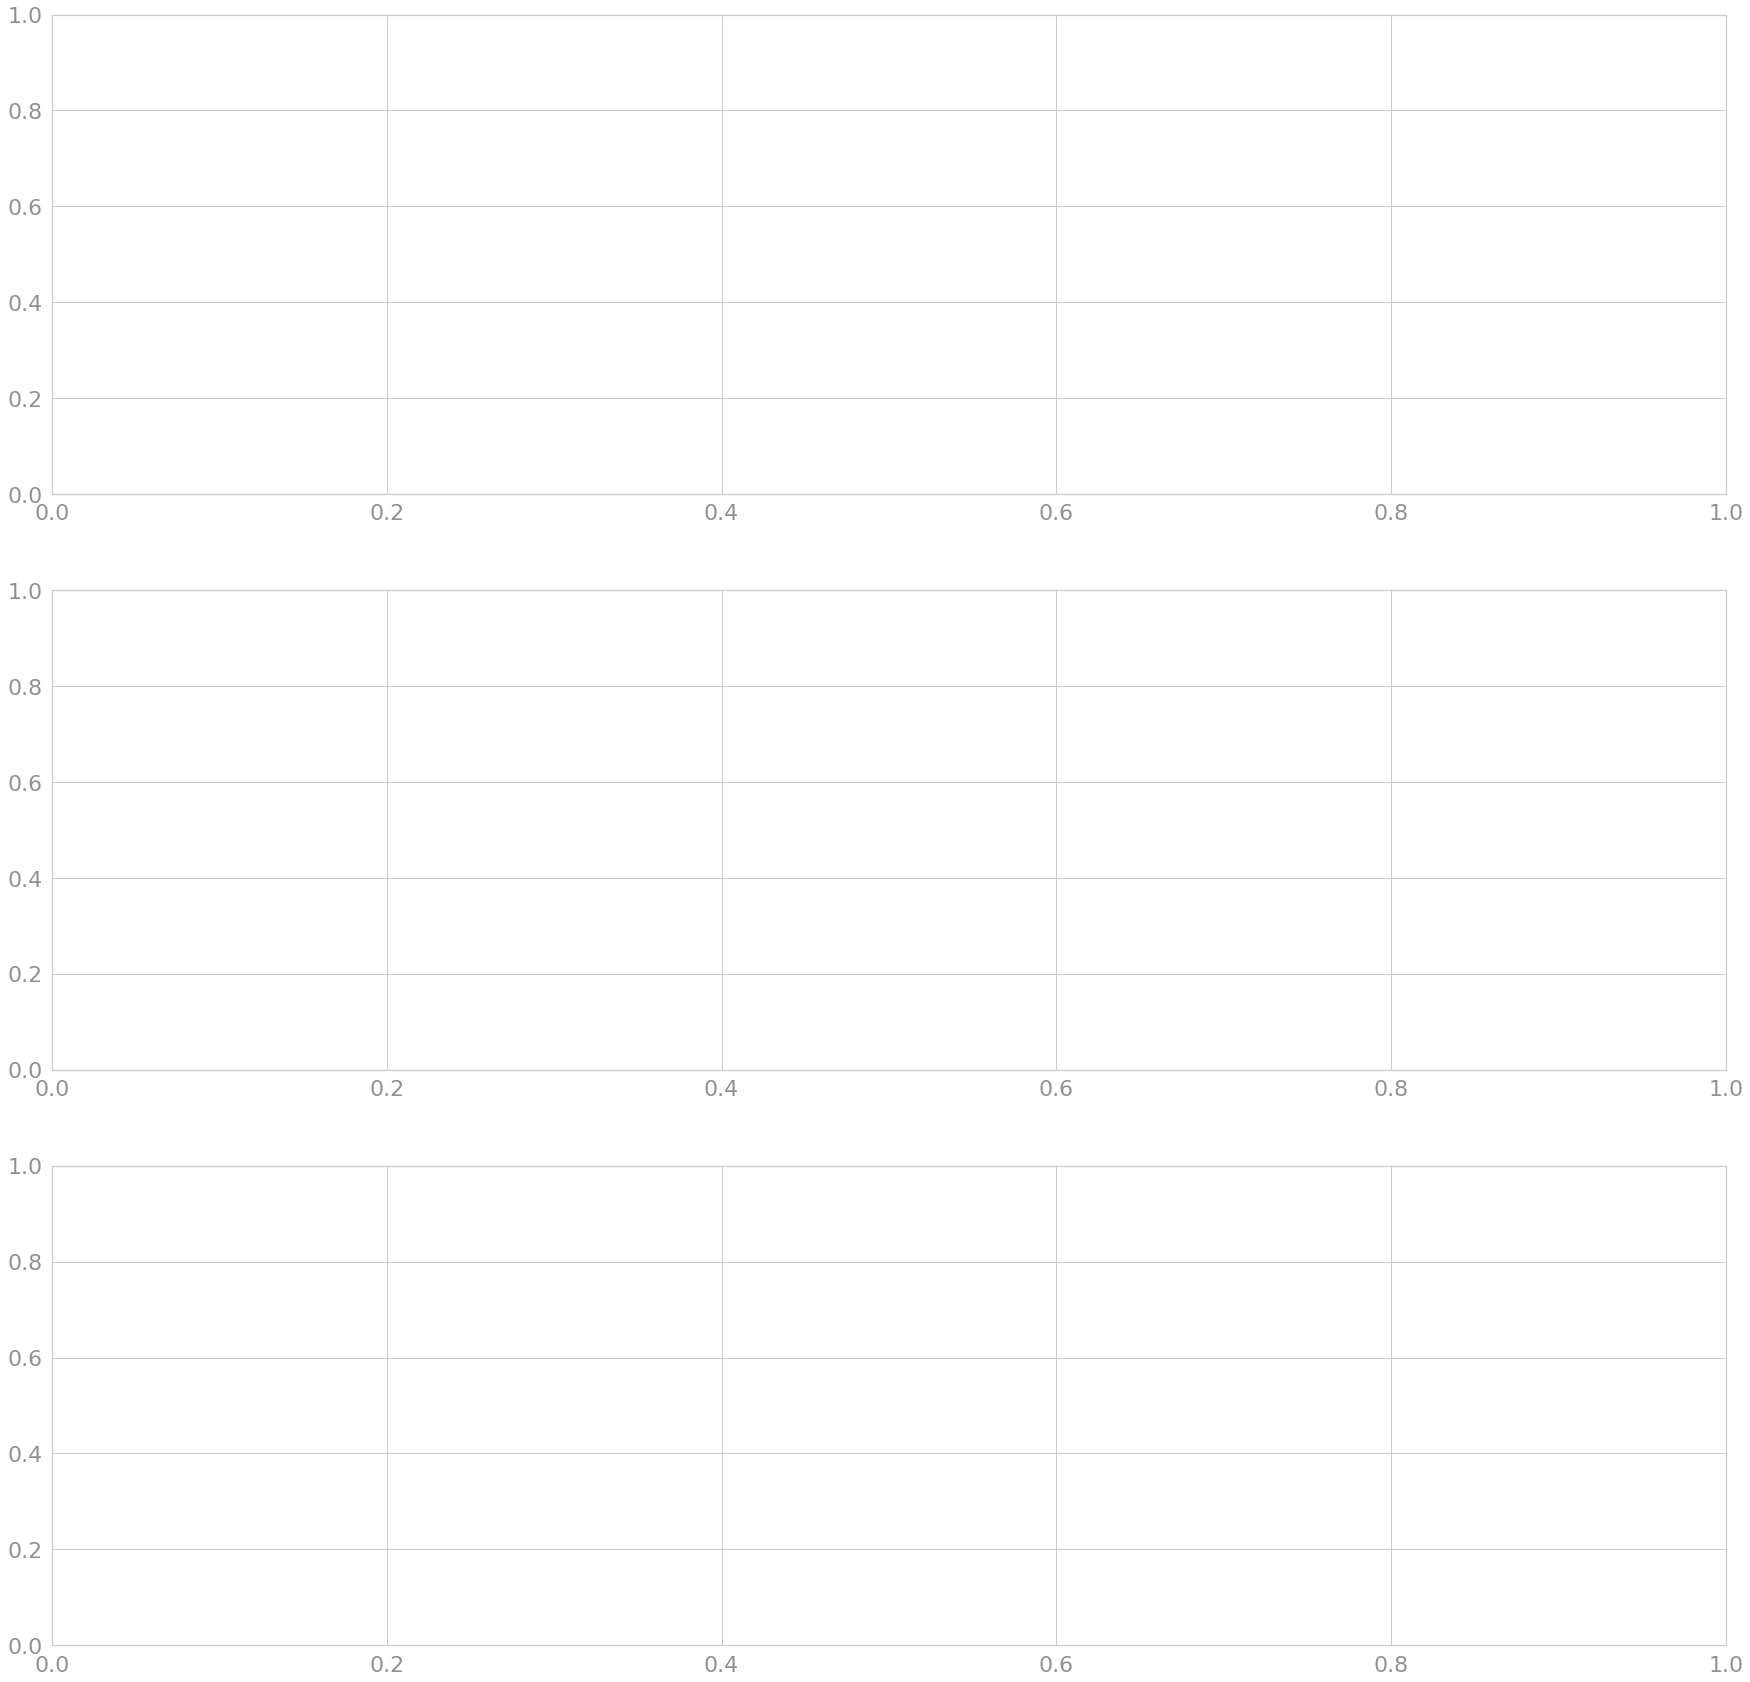

In [56]:
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
rain_ho_day['date']=pd.to_datetime(rain_ho_day['date'],errors='coerce')
rain_ho_day.set_index(rain_ho_day['date'], inplace=True)

fig, ax = calmap.calendarplot(rain_ho_day['hours_raining'], fig_kws={"figsize":(30,30)})
plt.title("Hours raining")
fig, ax = calmap.calendarplot(rain_ho_day['rain_amount'], fig_kws={"figsize":(30,30)})
plt.title("Total Rainfall Daily")

In [ ]:
os.chdir("../data")
wet_F_T=pd.read_csv('wet_cycling_S_N.csv', engine = "c")
wet_F_T=wet_F_T.iloc[:,1:]
wet_F_T.to_csv('table1.csv')
wet_F_T

In [26]:
# Monthly plot of rainy days

wet_F_T1=wet_F_T.groupby(wet_F_T["get_wet_cycling"]).count()
wet_F_T1.to_csv('table1.1.csv')
wet_F_T1

,day
get_wet_cycling,
True,883


In [27]:
os.chdir("../data")
valoration=pd.read_csv("valoration_final.csv", engine = "c")
valoration=valoration.iloc[:,1:].sort_values(by='valoration', ascending=False, na_position='first')

valoration.to_csv('table2.csv')
valoration

,Locations,valoration,What people like about this location,What they disike about this location
8,Mountjoy Square,5,"Park,Buildings, Amenities close by","Up-keep of square ,Anti-Social, buildings"
9,Meath Street,5,"People,Variety,Market","Movement, Buildings , Apperance of street"
10,Thomas Street,5,"Tradition & Character of the Street, Mixed Use...","Abandoned shops and buildings, Dirty appearanc..."
5,Corner of Parnell & Nth Great Georges Street,4,People / Variety of restaurants-shops / \nBuil...,"Drugs on street, Appearance of buildings, Safety"
6,Camden Street,4,"Variety,sense of community,traditonal","Closed shops, public behaviour at night, movement"
7,Francis Street,4,"Character of Street,History of Street,Variety ...","Anti-social,Cleanliness,lack of toilets"
2,Aungier Street,3,"Feeling on the street,the rustic look of the s...","Cleanliness,traffic -unsafe crossing, Image of..."
3,Manor Street,3,"Community,Old Village Feel,Character","Up-keep look of Meath Street, Movement, Vacancy"
4,Ellis Quay,3,"River,Bridges,Buildings","Movement, up-keep of Quay, Buildings"
1,Arran Quay,2,"River, Bridges,Buildings","Buildings, Congestion/ Movement, Paving"


In [28]:
os.chdir("../data")
nationalities_trip=pd.read_csv("nationalities_trip.csv", engine = "c")

nationalities_trip.rename(columns={'Unnamed: 0': "nationalities"}, inplace= True)
df=nationalities_trip[nationalities_trip["Total"]>200]


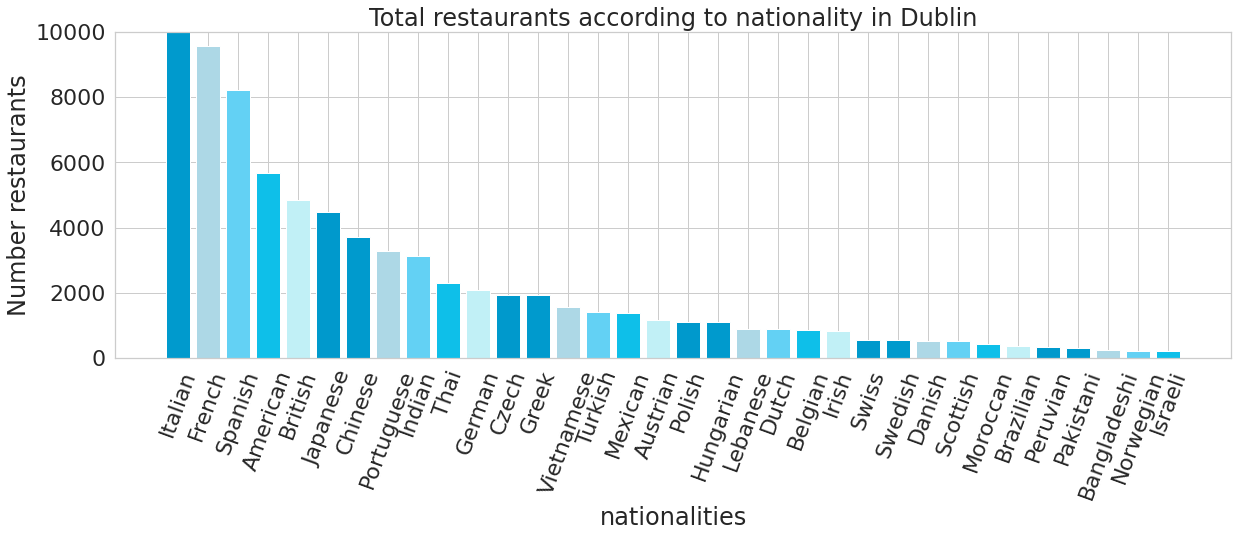

In [29]:
fig, ax = plt.subplots(figsize = (20,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=20
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
ind = np.arange(len(df['nationalities']))
bars1 = ax.bar(ind, df['Total'], 
        color = color_palette_list, 
        label="Number restaurants")
ax.set_title("Total restaurants according to nationality in Dublin")
ax.set_ylabel("Number restaurants")
ax.set_ylim((0,10000))
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(list(df['nationalities']), rotation=70)
ax.set_xlabel("nationalities")
plt.show()

In [49]:
#esta grafica tengo que intentar mejorarla porque veo un error
os.chdir("../data")
data2=pd.read_csv('employment.csv', engine = "c")
data2
data2['Quarter']=pd.to_datetime(data2['Quarter'],errors='coerce')
data2=data2[data2["Quarter"]>"1800-01-01"]

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (8).

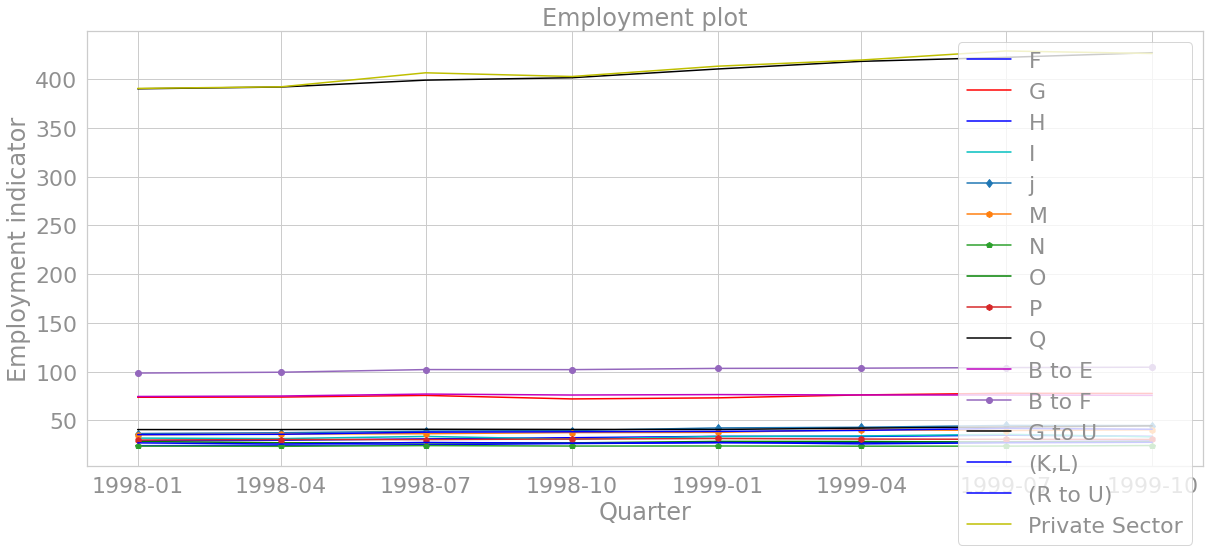

In [50]:
plt.figure(figsize=(20,8))
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Construction (F)'],'b-',label='F')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Wholesale and retail trade, repair of motor vehicles and motorcycles (G)'],'r-',label='G')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Transportation and storage (H)'],'b-',label='H')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Accommodation and food service activities (I)'],'c-',label='I')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Information and communication (J)'],'d-',label='j')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Professional, scientific and technical activities (M)'],'h-',label='M')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Administrative and support service activities (N)'],'p-',label='N')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Public administration and defence, compulsory social security (O)'],'g-',label='O')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Education (P)'],'h-',label='P')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Human health and social work activities (Q)'],'k-',label='Q')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Industry (B to E)'],'m-',label='B to E')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Industry and Construction (B to F)'],'o-',label='B to F')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Services (G to U)'],'k-',label='G to U')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Financial, insurance and real estate activities (K,L)'],'b-',label='(K,L)')
plt.plot(data2['Quarter'],data2['Dublin Employment (\'000) - Other NACE activities (R to U)'],'b-',label='(R to U)')
plt.plot(data2['Quarter'],data2['Private Sector'],'y-',label='Private Sector')

plt.xlabel('Quarter');plt.ylabel('Employment indicator');plt.title('Employment plot');plt.legend()
ax.set_xticklabels(data2['Quarter'], rotation=45)

In [32]:
os.chdir("../data")
df=pd.read_csv("pedestrian_group.csv", engine = "python")


In [33]:
df.reset_index(level=0, inplace=True)
df=df.iloc[:,1:]
df.head()

,day_of_week,hour,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",...,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,Fri,0,443,448.0,0.0,264,967,724,3850,2361,...,1000,1121,148.0,0.0,159.0,922.0,0.0,72,269,156
1,Fri,1,223,147.0,0.0,186,521,181,3367,1039,...,630,752,40.0,0.0,75.0,288.0,0.0,26,85,46
2,Fri,2,87,90.0,0.0,134,184,106,704,621,...,312,305,30.0,0.0,49.0,220.0,0.0,17,44,23
3,Fri,3,49,73.0,0.0,107,151,53,251,309,...,212,766,15.0,0.0,60.0,96.0,0.0,7,30,22
4,Fri,4,75,45.0,0.0,128,158,59,135,174,...,214,348,18.0,0.0,27.0,61.0,0.0,168,21,29


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


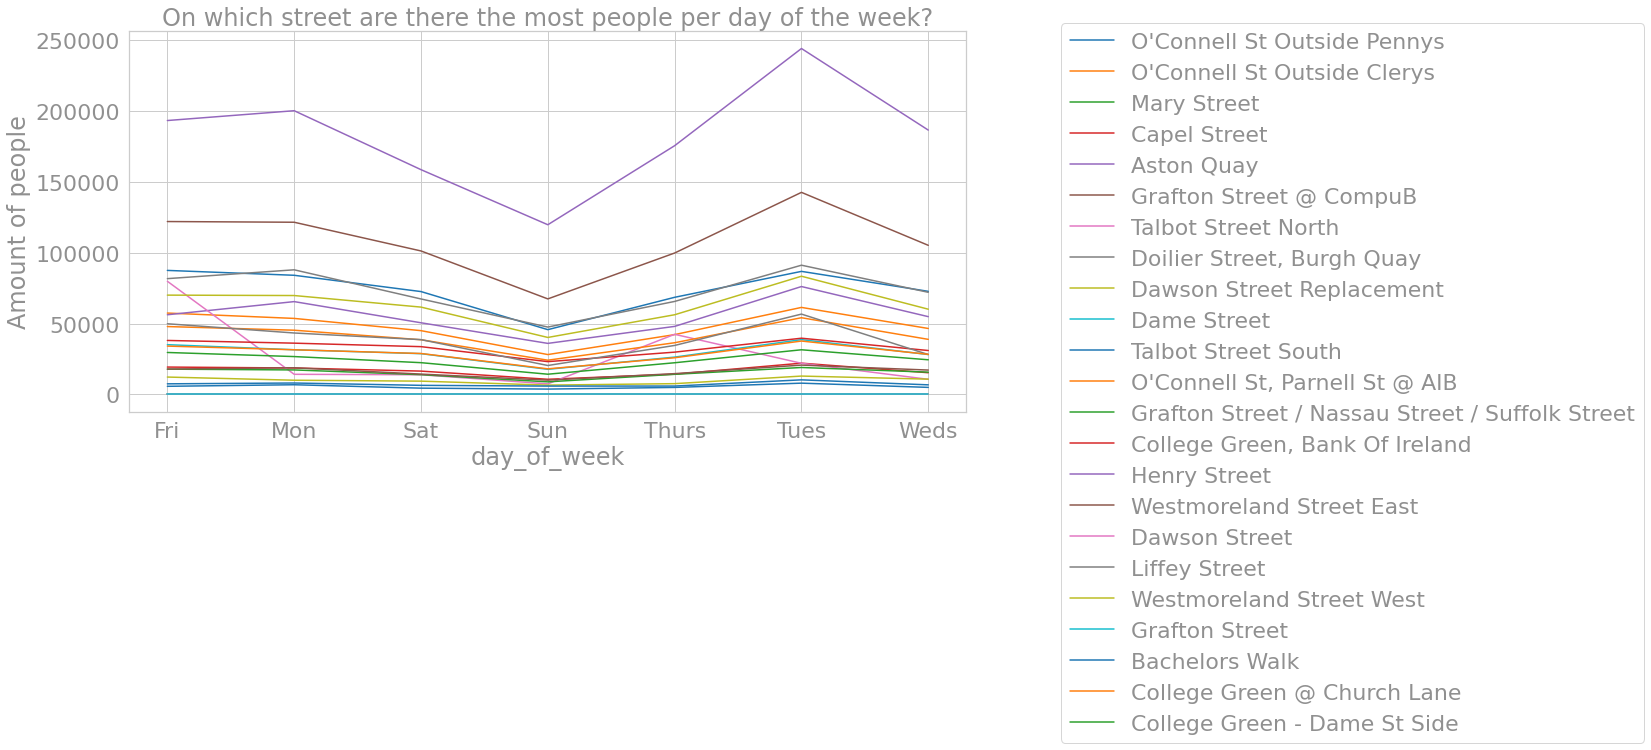

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['day_of_week']).sum()[["O'Connell St Outside Pennys",
       "O'Connell St Outside Clerys", 'Mary Street', 'Capel Street',
       'Aston Quay', 'Grafton Street @ CompuB', 'Talbot Street North',
       'Doilier Street, Burgh Quay', 'Dawson Street Replacement',
       'Dame Street', 'Talbot Street South', "O'Connell St, Parnell St @ AIB",
       'Grafton Street / Nassau Street / Suffolk Street',
       'College Green, Bank Of Ireland', 'Henry Street',
       'Westmoreland Street East', 'Dawson Street', 'Liffey Street',
       'Westmoreland Street West', 'Grafton Street', 'Bachelors Walk',
       'College Green @ Church Lane', 'College Green - Dame St Side']].plot(ax=ax)
plt.xlabel('day_of_week');plt.ylabel('Amount of people');plt.title('On which street are there the most people per day of the week?');
ax.legend(bbox_to_anchor=(1.1, 1.05))